# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here.
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas.testing as tm

%matplotlib inline

student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

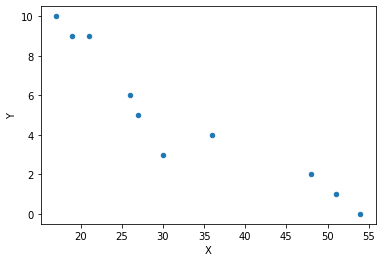

In [4]:
# Your code here.
student_data.plot.scatter('X', 'Y')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [6]:

"""
The tardiness of a student is negatively related to its age. The older the student, the less prone to being late it is.
"""

'\nThe tardiness of a student is negatively related to its age. The older the student, the less prone to being late it is.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [7]:
# Covariance
student_data.cov()

,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


In [8]:
# Correlation
student_data.corr()

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


In [9]:
"""
The correlation equates to the normalized covariance by the standard deviation.
The correlation shows the two sets of variables are negatively correlated.
The covariance shows how both variables change in tandem, and the scale of this change.
"""

'\nThe correlation equates to the normalized covariance by the standard deviation.\nThe correlation shows the two sets of variables are negatively correlated.\nThe covariance shows how both variables change in tandem, and the scale of this change.\n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [13]:
a = student_data['X']
b = student_data['Y']

model = sm.OLS(b, a)
results = model.fit()
prediction = results.predict(a)
prediction

0    1.633022
1    4.899065
2    2.593623
3    2.017262
4    3.458164
5    4.610885
6    1.825142
7    2.497563
8    5.187245
9    2.881803
dtype: float64

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.327
Model:                            OLS   Adj. R-squared (uncentered):              0.252
Method:                 Least Squares   F-statistic:                              4.375
Date:                Mon, 10 May 2021   Prob (F-statistic):                      0.0660
Time:                        20:51:17   Log-Likelihood:                         -30.028
No. Observations:                  10   AIC:                                      62.06
Df Residuals:                       9   BIC:                                      62.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.0961      0.046      2.092      0.066      -0.008       0.200
==============================================================================
Omnibus:                        1.418   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                0.718
Skew:                           0.002   Prob(JB):                        0.698
Kurtosis:                       1.687   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

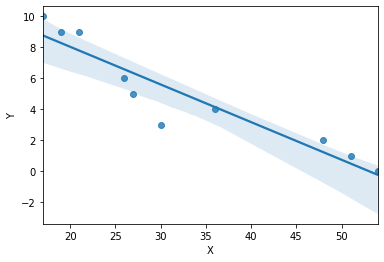

In [16]:
# Your code here.
sns.regplot(x='X', y='Y', data=student_data)

In [17]:
from scipy import stats
X = student_data.X
Y = student_data.Y
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


In [18]:
x = np.linspace(student_data.X.min(), student_data.X.max(), 2)
y = slope * x + intercept

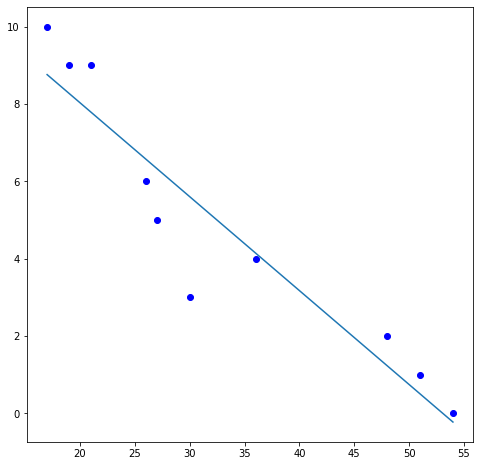

In [23]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(student_data.X, student_data.Y, c='blue')
ax.plot(x, y)

In [24]:
print('R-squared: ' + str(r_value**2))

from sklearn.metrics import mean_squared_error

print('RMSE: ' + str(np.sqrt(mean_squared_error(student_data.Y, slope * student_data.X + intercept))))
print(p_value)

R-squared: 0.8820265558250108
RMSE: 1.1540884648655088
5.56665383455343e-05


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [25]:
# Your response here. 
"""
As the plot of the linear regression shows, the conclusion is that the older a student is, the less prone to tardiness it will be.
Therefore, age is a good predictor of how late a student will be.
"""

'\nAs the plot of the linear regression shows, the conclusion is that the older a student is, the less prone to tardiness it will be.\nTherefore, age is a good predictor of how late a student will be.\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [27]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [28]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [29]:
vehicles_sel_cols = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
vehicles_sel_cols.corr()['CO2 Emission Grams/Mile']

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [21]:
# Your response here.
a = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
b = vehicles['CO2 Emission Grams/Mile']

model = sm.OLS(b, a).fit()
model_prediction = model.predict(a)
model_details = model.summary()
print(model_details)

                                   OLS Regression Results                                   
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Sat, 05 Sep 2020   Prob (F-statistic):                        0.00
Time:                             14:12:18   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
                        coef    std err          t      P>|t|      [0.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [26]:
# Your response here.
from sklearn import preprocessing
# Get column names first
cols = vehicles_sel_cols.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(vehicles_sel_cols)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
scaled_df

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,-1.657526,-1.005601,0.398406,-0.572991,0.113229,0.398528
1,-1.657526,0.133841,1.733866,-1.355412,1.296774,1.749543
2,-1.558371,-1.005601,0.669671,-0.768596,0.409115,0.672953
3,-1.558371,0.133841,1.733866,-1.355412,1.296774,1.749543
4,-1.360059,0.133841,0.669671,-0.768596,1.296774,0.672953
...,...,...,...,...,...,...
35947,1.217989,-1.575323,-1.892278,3.143509,-1.563460,-1.942870
35948,1.317145,-1.575323,-1.892278,3.143509,-1.563460,-1.951269
35949,1.416300,-1.575323,-1.892278,3.143509,-1.563460,-1.942870
35950,1.515456,-1.575323,-1.892278,3.143509,-1.563460,-1.926071


In [ ]:
X = scaled_df['']

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [30]:
parties_data = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14], 'Y': [1, 2, 4, 4, 5, 7, 8, 13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

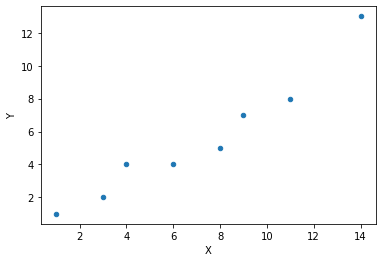

In [32]:
parties_data.plot.scatter('X', 'Y')

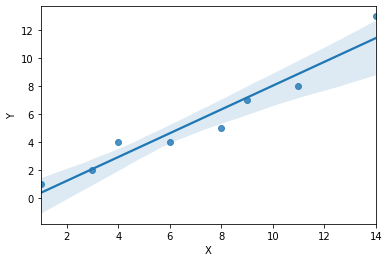

In [35]:
sns.regplot(x='X', y='Y', data=parties_data)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [34]:
from scipy import stats
X = parties_data.X
Y = parties_data.Y
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 0.8484848484848485
The intercept is: -0.43939393939393945


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 